# COVID-19 growth rate and population density

This was a quick analysis I ran a couple of months back out of curiosity. I was wondering whether the rate of increase of COVID-19 cases and deaths correlated with the population density. I compared the data with a physics-inspired model. Now, the model turned out to be too simple to capture the real dynamics of the spread of the disease, but it was still fun to do this analysis.

So, inspired my models seen in many areas of physics, let's assume we have a number of cases $N_c$ living in an area where the population surface density is $n$. We'll assume that it's early in the spreading of the virus that the number of cases is much smaller than the total number of people.

## How should the rate of increase of COVID cases depend on the area's population density?

<img src="covid_spread_sketch.png" width="300" align="right">
In the opposite figure, a sick person is represented by an 'x' while healthy persons are represented by gray circles. We model the process as the contaminated person moving with speed $v$ with respect to the crowd. Any healthy person which enters the effective area $A_{eff}$ --a circle of diameter $D_{eff}$-- is considered to be contaminated.

In this case, the number of new cases from 1 sick person in time $\Delta t$ is:

$\Delta N_c^{(1)} = n \Delta A$

where $\Delta A$ is the new area swept by the circle as it moves, which for very small $\Delta t$ (to first order) gives

$\Delta N_c^{(1)} = n \times \pi D_{eff} v \Delta t$

And because there's no overlap between sick people's circles, since they are much fewer than healthy people, we can just multiply the above by $N_c$ to get the total change:

$\Delta N_c = N_c \times n \times \pi D_{eff} v \Delta t$

Or taking the limit and changing $\Delta N_c / \Delta t$ to a rate of change of $N_c$:

$\frac{ dN_c}{dt} = n \pi D_{eff} v \times N_c$

Now, as soon as we see that the rate of change is proportional to the number, that always means an exponential solution:

$N_c = N_0 e^{n\pi D_{eff} v t}$

The important part here is that the growth of the exponential depends on:
- The density, $n$
- The effective diameter $D_{eff}$ which I take as a property of the virus, i.e. how contagious it is
- And $v$, which would represent how frequently people interract. We will be looking at data before much of the social distancing was implemented. So, (ignoring cultural difference from state to state) we will assume that $v$ is the same accross the US.

Since we can assume/approximate $v$ and $D_{eff}$ to be constant from location to location, then the only thing that the rate of growth should depend on (in this very simple model) is the density $n$, in a linear way.

For what's coming up next let's define the time scale $t_0$ such that $t_0 = 1/n\pi D_{eff} v$. This makes it possible to write 

$N_c = N_0 e^{t/t_0}$

# Can this dependence on density be verified?

The fun part is that this hypothesis is easily verifiable. The New York Times publishes the number of cases and deaths daily, [here](https://github.com/nytimes/covid-19-data) from every US county, and the US Census data contains all the population density data [here](https://www.census.gov/library/publications/2011/compendia/usa-counties-2011.html#POP).

I've downloaded these datasets. For the NYT COVID-19 data, I've only up to April 8, before the number of daily cases started to decrease.

There are of course some caveats to keep in mind. For example the fact that COVID-19 testing is not so pervasive to count all cases.

So let's look at the data!

The [``nytcovid_jupyter``](./nytcovid_jupyter.py) module loads the relevant data into the ``counties`` dictionary and the ``census`` pandas Data Frame. Each element of ``counties`` is an instance of the ``County`` class, also found in the same module.

In [1]:
from nytcovid_jupyter import *

The keys of the ``counties`` dictionary are simply the name of each county:

In [2]:
print(list(counties.keys())[0:10])

['Snohomish, WA', 'Cook, IL', 'Orange, CA', 'Maricopa, AZ', 'Los Angeles, CA', 'Santa Clara, CA', 'Suffolk, MA', 'San Francisco, CA', 'Dane, WI', 'San Diego, CA']


Here's a look at the different variables in a ``County`` instance.

In [3]:
dir(counties['Snohomish, WA'])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cases',
 'date',
 'deaths',
 'deltatime',
 'dt',
 'fitcases',
 'fitdeaths',
 'name']

For example, the ``dt`` variable contains the number of days after (or before) the 10<sup>th</sup> case:

In [4]:
sno = counties['Snohomish, WA']
print( sno.dt )

[-42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


And the ``cases`` array contains the number of cases

In [5]:
print( sno.cases )

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 5, 8, 17, 18, 26, 36, 45, 61, 69, 107, 132, 154, 175, 199, 265, 309, 347, 384, 446, 480, 518, 613, 633, 778, 913, 912, 1067, 1126, 1228, 1304, 1375, 1449, 1502, 1558, 1602, 1658]


We can plot the number of cases vs time, for this particular county.

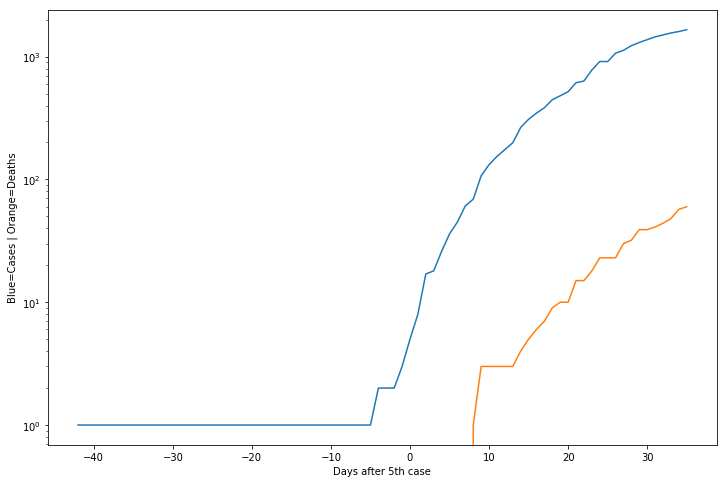

In [6]:
pl.figure(figsize=(12, 8))

pl.semilogy(sno.dt, sno.cases)
pl.semilogy(sno.dt, sno.deaths)

pl.xlabel('Days after 5th case')
pl.ylabel('Blue=Cases | Orange=Deaths')

pl.show()

Notice that on a semi-log plot, the curve rises in a straight fashion for a good stretch, before slowing down the growth. A straight line in such a plot is what exponential growth looks like.

We can also use this function to plot all cases vs time curves from the ``counties`` dictionary:

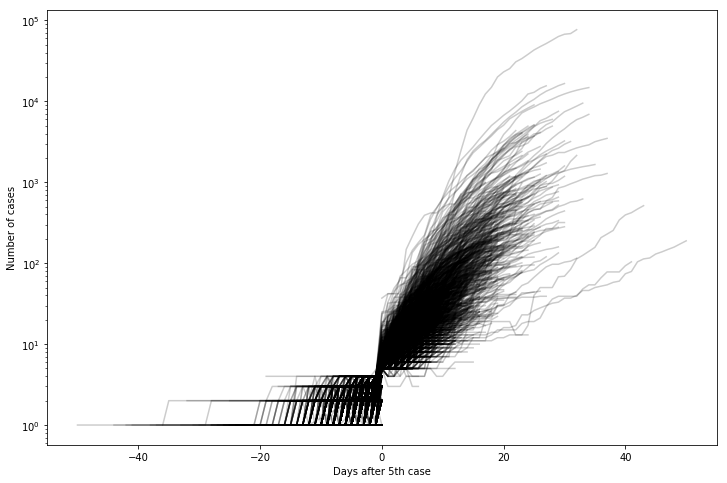

In [7]:
plotall()

So what we need to do is quantify this rate of exponential growth to measure the $t_0$ for each of these curves, reprenting different counties, and see if $t_0$ depends on the population density of its corresponding county. In what follows we will plot the exponential rate, which is $1/t_0$. The higher the exponential rate the faster the exponential increase.

The function ``casesvsdensity()`` fits every counties cases vs time curve, and extracts the exponential rate. 

Now we can't fit the curve with a simple exponential, because at some points states started closing down, which slowed down the exponential growth. This happened at different points in time for different counties. So we use a model which corresponds to **two** exponential curves which join at some middle time, as you see below.

We are interested in the initial exponential growth, before social distancing measures were applied, as I expect that to better correspond at my model.

/home/tyk/mysoft/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


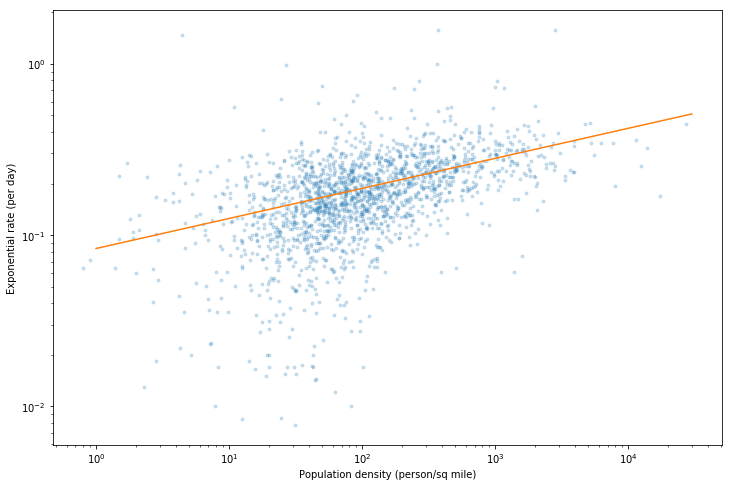

In [8]:
pars, cov = casesvsdensity()

Before going further, we should check if the fits are good. The ``checkfit()`` function will interractively plot the fit plots for the counties in the order they appear in the ``counties`` dictionary.

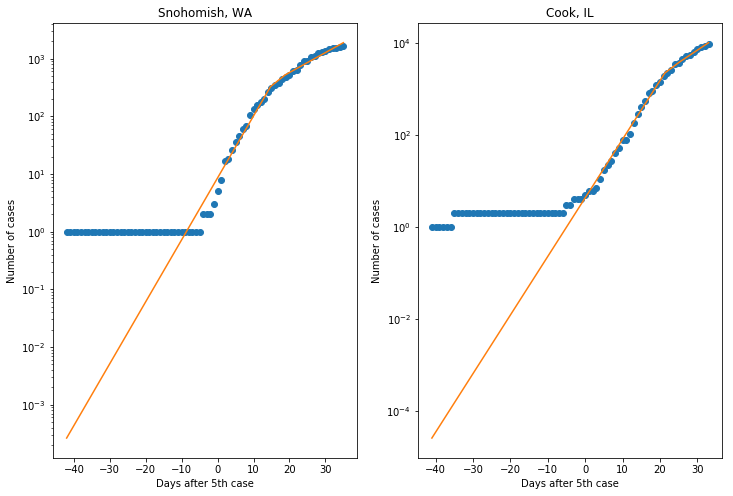

Enter "q" to exit loop, anything else to continue: 


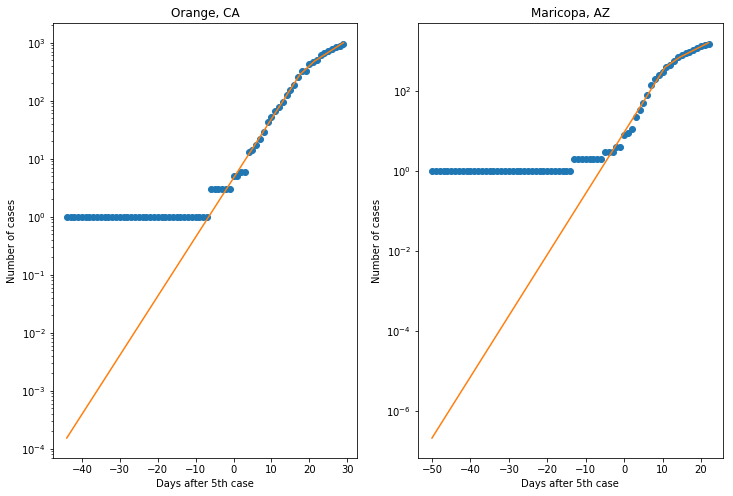

Enter "q" to exit loop, anything else to continue: 


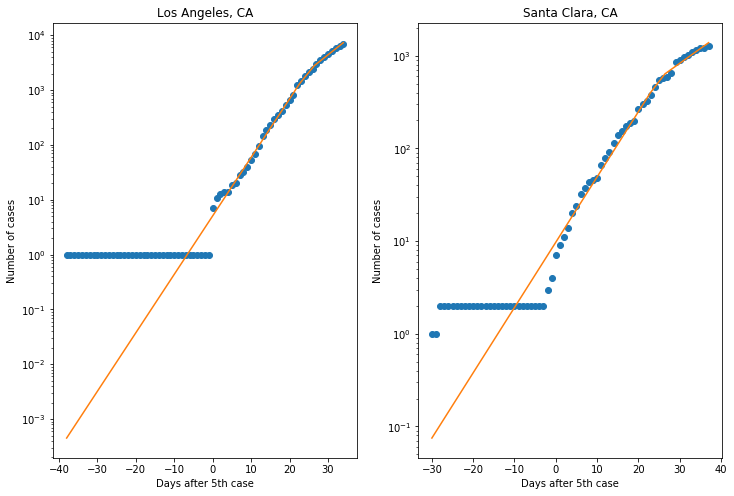

Enter "q" to exit loop, anything else to continue: q


In [9]:
checkfit()

The model does a good job of following the "bend" in the growth of the number of cases.

We can also look at the goodness of fit more carefully by looking at the distribution of reduced $\chi^2$ values:

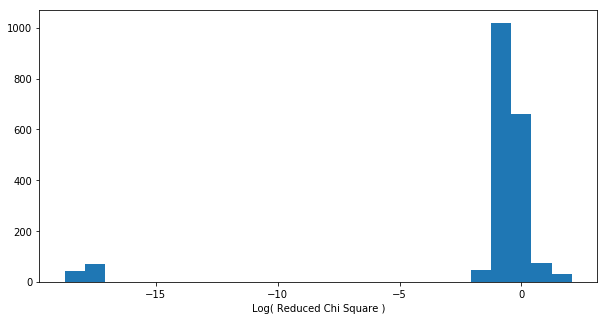

In [10]:
redchi2 = []

for county in counties : 
    
    cty = counties[county]
    
    # check if fit was done
    if hasattr(cty, 'aa') :
        
        # calculate reduced chi^2 value using the expfunc() which
        # returns the piecewise exponential used in the fitting
        redchi2.append( np.sum( 
            ( (np.array(expfunc( cty.dt, cty.aa, cty.t0, cty.tbend, cty.t1)) - cty.cases) / cty.dcases )**2 ) 
                       / (len(cty.dt)-4) )
        
pl.figure(figsize=(10, 5))
pl.hist(np.log10(redchi2), 25)
pl.xlabel('Log( Reduced Chi Square )')
pl.show()

Or, zooming in on the right concentration:

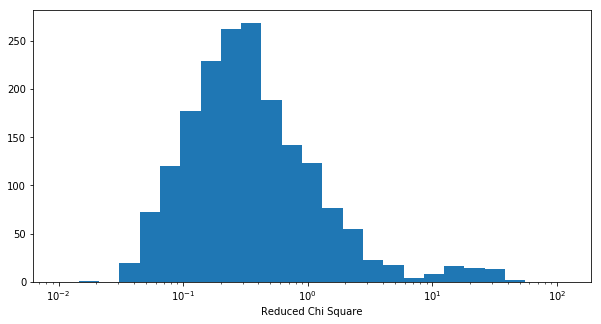

In [11]:
xhist = 10**np.linspace( -2, np.log10(max(redchi2)), 26)

pl.figure(figsize=(10, 5))
pl.hist(redchi2, xhist)
pl.xscale('log')
pl.xlabel('Reduced Chi Square')
pl.show()

Since the vast majority of reduced $\chi^2$ values are less than order unity, that indicates that the fits are not completely off.

So we can now compare the measured dependence on population to the expected dependence of $ 1/t_0 \propto n$.

We fit the exponential rate vs population to a power law, i.e. $y = A \times x^{p}$, and compare the best-fit value of the power, $p$ to the expected value of 1.

This was already done by the ``casesvsdensity()`` function, and the value of the power was returned and captured in the variable ``pars``:

In [12]:
print( pars[1] )

0.1755934900864853


The obtained dependence on density is $1/t_0 \propto n^{0.176}$, which kind of way off what we expected. Another way to view how bad this model is off is to plot it with the data, as the red line below:

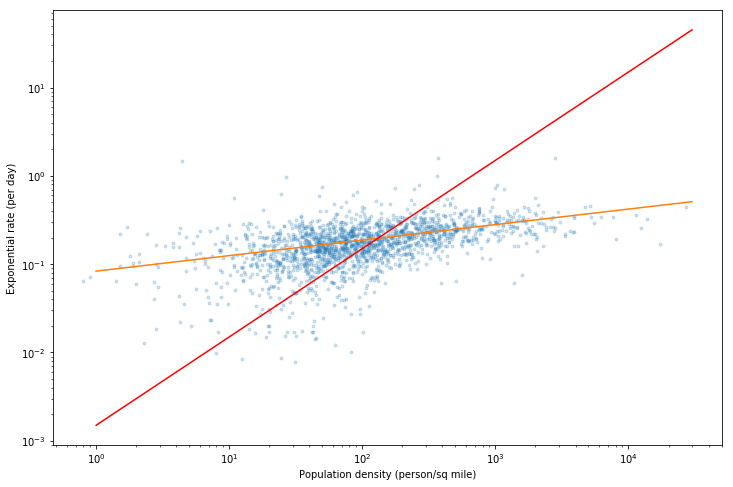

In [13]:
pl.figure(figsize=(12, 8))

# Plot of the data
pl.loglog(census.density[census.t0.notna() & (census.t0 < 1e6)], 
          1/census.t0[census.t0.notna() & (census.t0 < 1e6)], '.', alpha=0.2)

# Plot of the model, in orange
xx = np.linspace(1, 3e4, 2)
pl.loglog(xx, pars[0] * xx**pars[1])
pl.xlabel('Population density (person/sq mile)')
pl.ylabel('Exponential rate (per day)')

# Plot of the expected linear dependence on density in 
# red
pl.plot(xx , .15 * (xx/100), 'r')

pl.show()

## Post-Analysis Reflections

I have probably arrived at something that every epidemiologist learns in their first class on the subject. This simple model probably doesn't describe well enough how interractions happen. The rate of encounters between people doesn't simply scale like the population density. The latter parameter does give a slight hint, but not nearly as my simple physics-inspired model suggests. 

Perhaps one can look for the effect of many factors at once --including population density, the number of businesses, restaurants, places of worship per capita, etc-- using some classification algorithm.

But, I'll leave it at this for now!